In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
train_dataset = pd.read_csv(r'C:\Users\TARUN GUPTA\Downloads\train.csv')
train_dataset.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [3]:
pd.isnull(train_dataset)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3605,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3606,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3607,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
train_dataset['activity']=number.fit_transform(train_dataset['activity'].astype('str'))
print(train_dataset)

         rn  activity  tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  \
0         7         2            0.279         -0.01960          -0.1100   
1        11         2            0.277         -0.01270          -0.1030   
2        14         2            0.277         -0.01470          -0.1070   
3        15         2            0.298          0.02710          -0.0617   
4        20         2            0.276         -0.01700          -0.1110   
...     ...       ...              ...              ...              ...   
3604  10277         5            0.357         -0.04460          -0.1300   
3605  10278         5            0.344          0.00479          -0.1220   
3606  10279         5            0.284         -0.00796          -0.1190   
3607  10280         5            0.207          0.02460          -0.1040   
3608  10281         4            0.393         -0.01780          -0.0902   

      tBodyAcc.std.X  tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAcc.mad.X  \
0            -0

In [5]:
train_dataset=abs(train_dataset)
print(train_dataset)

           rn  activity  tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  \
0         7.0       2.0            0.279          0.01960           0.1100   
1        11.0       2.0            0.277          0.01270           0.1030   
2        14.0       2.0            0.277          0.01470           0.1070   
3        15.0       2.0            0.298          0.02710           0.0617   
4        20.0       2.0            0.276          0.01700           0.1110   
...       ...       ...              ...              ...              ...   
3604  10277.0       5.0            0.357          0.04460           0.1300   
3605  10278.0       5.0            0.344          0.00479           0.1220   
3606  10279.0       5.0            0.284          0.00796           0.1190   
3607  10280.0       5.0            0.207          0.02460           0.1040   
3608  10281.0       4.0            0.393          0.01780           0.0902   

      tBodyAcc.std.X  tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAcc.

In [6]:
X=train_dataset.iloc[:,2:]
print(X.shape)
y = train_dataset.iloc[:,1:2]
print(y.shape)
print(type(train_dataset))

(3609, 561)
(3609, 1)
<class 'pandas.core.frame.DataFrame'>


# Feature selection

In [7]:
chi2_features = SelectKBest(chi2, k = 105) 
print(type(chi2_features))
X_kbest_features = chi2_features.fit_transform(X, y) 
print(type(X_kbest_features))
X_kbest_features = pd.DataFrame(X_kbest_features)
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 
print(X_kbest_features.head())

<class 'sklearn.feature_selection._univariate_selection.SelectKBest'>
<class 'numpy.ndarray'>
Original feature number: 561
Reduced feature number: 105
     0      1      2      3      4      5      6      7      8      9    ...  \
0  0.997  0.967  0.983  0.997  0.966  0.983  0.941  0.566  0.851  0.674  ...   
1  0.995  0.973  0.985  0.996  0.974  0.985  0.940  0.555  0.845  0.685  ...   
2  0.999  0.991  0.993  0.999  0.991  0.992  0.943  0.569  0.852  0.693  ...   
3  0.989  0.817  0.902  0.989  0.794  0.888  0.926  0.448  0.849  0.681  ...   
4  0.998  0.991  0.998  0.998  0.989  0.997  0.946  0.573  0.847  0.693  ...   

     95     96     97     98     99     100    101  102    103     104  
0  0.990  0.988  0.991  0.988  0.994  0.988  0.991  1.0  0.984  0.0430  
1  0.992  0.985  0.987  0.983  0.988  0.985  0.984  1.0  0.982  0.0347  
2  0.997  0.996  0.995  0.994  0.995  0.996  0.994  1.0  0.998  0.0351  
3  0.971  0.989  0.988  0.984  0.990  0.989  0.984  1.0  0.898  0.0364  
4  

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2887, 105)
(2887, 1)
(722, 105)
(722, 1)


In [9]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\Users\TARUN GUPTA\.conda\envs\new_envi\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
X_test = pd.DataFrame(X_test)
for i in y_pred:
    print('{}'.format(i),end='\t')
len(y_pred) 
print(y_pred.shape)

2	1	4	5	2	2	0	4	0	0	2	5	3	0	0	5	4	2	0	5	2	5	2	5	0	2	4	5	5	5	4	3	5	4	0	4	0	2	4	2	5	5	1	3	0	2	2	0	0	0	1	2	3	1	3	1	3	0	0	1	1	1	2	3	0	3	5	1	3	2	1	2	1	2	0	2	2	0	0	0	1	5	4	5	2	1	2	2	0	5	4	3	3	5	5	5	4	2	5	2	2	1	2	3	3	5	4	2	3	3	4	5	4	5	5	4	3	1	4	2	1	5	0	0	4	5	2	2	4	3	3	5	0	1	3	4	2	4	1	1	4	2	4	2	2	0	2	1	5	1	2	0	3	1	5	0	1	2	5	0	0	3	1	3	3	1	1	2	1	0	5	2	2	1	5	5	1	1	3	0	4	3	0	1	2	4	2	5	0	4	2	3	2	2	1	0	1	1	0	5	5	1	5	3	0	5	5	1	0	2	0	2	2	1	4	4	2	3	5	4	3	2	4	1	2	4	2	4	4	5	0	3	3	4	0	1	1	3	2	3	3	5	2	1	5	1	2	1	2	0	0	1	2	3	1	1	0	4	4	4	3	2	0	3	1	2	3	2	4	3	5	0	3	3	2	3	3	0	0	5	1	5	2	1	5	5	3	2	5	0	2	3	2	1	4	5	2	4	0	5	1	5	1	5	3	3	0	5	1	0	5	3	2	1	3	4	4	5	3	1	0	4	2	1	3	3	4	0	4	1	1	3	3	1	0	0	4	0	2	2	3	1	5	5	1	0	3	0	5	5	1	4	4	5	2	3	2	5	2	5	1	3	4	3	1	2	0	0	3	0	5	4	2	1	2	1	5	0	5	1	5	2	2	2	4	2	2	5	1	0	2	5	5	4	3	3	5	0	2	2	1	2	0	3	0	0	1	3	2	1	1	0	2	2	4	0	0	5	3	3	0	2	3	1	3	0	3	1	2	0	2	0	2	2	1	5	3	2	1	3	1	0	3	3	1	2	0	0	3	1	4	0	2	0	1	0	0	4	2	0	3	1	1	0	5	0	1	5	5	1	4	5	4	1	0	2	5	2	3	0	3	5	5	3	2	5	3	1	0	4	3	4	0	5	4	2	2	5	1	1	

In [11]:
from sklearn import metrics
print("Accuracy=",metrics.accuracy_score(y_test,y_pred))

Accuracy= 0.9473684210526315


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       129
         1.0       0.93      0.86      0.89       132
         2.0       0.88      0.94      0.91       143
         3.0       0.97      1.00      0.98       117
         4.0       1.00      0.91      0.95        91
         5.0       0.95      0.98      0.96       110

    accuracy                           0.95       722
   macro avg       0.95      0.95      0.95       722
weighted avg       0.95      0.95      0.95       722



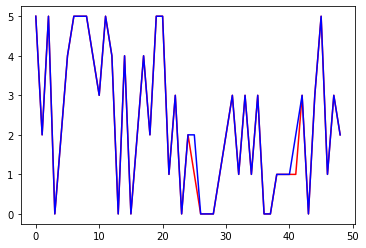

In [13]:
y_pred=pd.DataFrame(y_pred)
num = [int(i) for i in range(0,49)]
import matplotlib.pyplot as plt
A=y_test.iloc[21:70,:]
B=y_pred.iloc[21:70,:]

plt.plot(num, A, color='r')
plt.plot(num, B, color='b')
plt.show()

# Decision Tree

Accuracy= 0.8587257617728532


C:\Users\TARUN GUPTA\.conda\envs\new_envi\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\TARUN GUPTA\.conda\envs\new_envi\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision Score :  0.6911357340720221
Recall Score :  0.6911357340720221
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       129
         1.0       0.00      0.00      0.00       132
         2.0       0.54      0.97      0.70       143
         3.0       0.76      0.72      0.74       117
         4.0       0.87      0.74      0.80        91
         5.0       0.62      0.75      0.68       110

    accuracy                           0.69       722
   macro avg       0.61      0.69      0.64       722
weighted avg       0.59      0.69      0.63       722



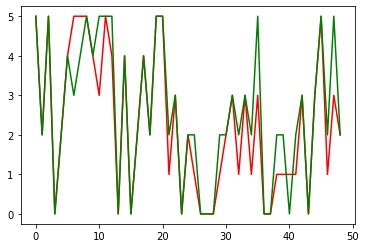

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy=",metrics.accuracy_score(y_test,y_pred))

clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, min_samples_leaf = 5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#print("Accuracy_k13",metrics.precision_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',average='micro'))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
y_pred=pd.DataFrame(y_pred)
num = [int(i) for i in range(0,49)]
A=y_test.iloc[21:70,:]
B=y_pred.iloc[21:70,:]
plt.plot(num, A, color='r')
plt.plot(num, B, color='g')
plt.show()

Accuracy :  0.7105263157894737
Precision Score :  0.7105263157894737
Recall Score :  0.7105263157894737
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       129
         1.0       0.89      0.23      0.37       132
         2.0       0.58      0.94      0.72       143
         3.0       0.76      0.72      0.74       117
         4.0       0.87      0.74      0.80        91
         5.0       0.62      0.75      0.68       110

    accuracy                           0.71       722
   macro avg       0.76      0.71      0.69       722
weighted avg       0.76      0.71      0.69       722



C:\Users\TARUN GUPTA\.conda\envs\new_envi\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


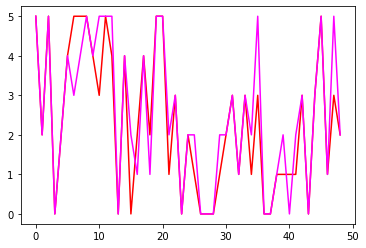

In [15]:
clf = DecisionTreeClassifier(criterion = "gini", max_depth = 3, min_samples_leaf = 5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',average='micro'))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
y_pred=pd.DataFrame(y_pred)
num = [int(i) for i in range(0,49)]
A=y_test.iloc[21:70,:]
B=y_pred.iloc[21:70,:]

plt.plot(num, A, color='r')
plt.plot(num, B, color='magenta')
plt.show()